In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [40]:
df = pd.read_csv('data/Clean_Dataset.csv')

In [41]:
df = df.drop(df.columns[0], axis=1)  

In [42]:
df = df.drop(columns=['flight'], axis=1)  # Drop the 'flight' column

In [43]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [44]:
df = df.join(pd.get_dummies(df['airline'], dtype=int)).drop(columns=['airline'], axis=1)

In [45]:
df

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0,0,0,0,1,0
1,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0,0,0,0,1,0
2,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,1,0,0,0,0,0
3,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0,0,0,0,0,1
4,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,0,0,0,0,0,1
300149,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,0,0,0,0,0,1
300150,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,0,0,0,0,0,1
300151,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,0,0,0,0,0,1


In [46]:
df = df.drop(columns=['departure_time', 'arrival_time'], axis=1)  # Drop the 'Unnamed: 0' column

In [47]:
df

,source_city,stops,destination_city,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,Delhi,zero,Mumbai,Economy,2.17,1,5953,0,0,0,0,1,0
1,Delhi,zero,Mumbai,Economy,2.33,1,5953,0,0,0,0,1,0
2,Delhi,zero,Mumbai,Economy,2.17,1,5956,1,0,0,0,0,0
3,Delhi,zero,Mumbai,Economy,2.25,1,5955,0,0,0,0,0,1
4,Delhi,zero,Mumbai,Economy,2.33,1,5955,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Chennai,one,Hyderabad,Business,10.08,49,69265,0,0,0,0,0,1
300149,Chennai,one,Hyderabad,Business,10.42,49,77105,0,0,0,0,0,1
300150,Chennai,one,Hyderabad,Business,13.83,49,79099,0,0,0,0,0,1
300151,Chennai,one,Hyderabad,Business,10.00,49,81585,0,0,0,0,0,1


In [48]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [49]:
mapping = {"zero": 0, "one": 1, "two_or_more": 2}

df['stops'] = df['stops'].map(mapping)

In [50]:
df

,source_city,stops,destination_city,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,Delhi,0,Mumbai,Economy,2.17,1,5953,0,0,0,0,1,0
1,Delhi,0,Mumbai,Economy,2.33,1,5953,0,0,0,0,1,0
2,Delhi,0,Mumbai,Economy,2.17,1,5956,1,0,0,0,0,0
3,Delhi,0,Mumbai,Economy,2.25,1,5955,0,0,0,0,0,1
4,Delhi,0,Mumbai,Economy,2.33,1,5955,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Chennai,1,Hyderabad,Business,10.08,49,69265,0,0,0,0,0,1
300149,Chennai,1,Hyderabad,Business,10.42,49,77105,0,0,0,0,0,1
300150,Chennai,1,Hyderabad,Business,13.83,49,79099,0,0,0,0,0,1
300151,Chennai,1,Hyderabad,Business,10.00,49,81585,0,0,0,0,0,1


In [51]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [52]:
df.rename(columns={'class': 'economy'}, inplace=True)

In [53]:
df

,source_city,stops,destination_city,economy,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,Delhi,0,Mumbai,Economy,2.17,1,5953,0,0,0,0,1,0
1,Delhi,0,Mumbai,Economy,2.33,1,5953,0,0,0,0,1,0
2,Delhi,0,Mumbai,Economy,2.17,1,5956,1,0,0,0,0,0
3,Delhi,0,Mumbai,Economy,2.25,1,5955,0,0,0,0,0,1
4,Delhi,0,Mumbai,Economy,2.33,1,5955,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Chennai,1,Hyderabad,Business,10.08,49,69265,0,0,0,0,0,1
300149,Chennai,1,Hyderabad,Business,10.42,49,77105,0,0,0,0,0,1
300150,Chennai,1,Hyderabad,Business,13.83,49,79099,0,0,0,0,0,1
300151,Chennai,1,Hyderabad,Business,10.00,49,81585,0,0,0,0,0,1


In [54]:
df['economy'] = df['economy'].map({'Business': 0, 'Economy': 1})

In [56]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [57]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [61]:
# df = df.join(pd.get_dummies(df['source_city'], dtype=int)).drop(columns=['source_city'], axis=1)
df = df.join(pd.get_dummies(df['destination_city'], dtype=int, prefix='dest')).drop(columns=['destination_city'], axis=1)
df

,stops,economy,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,...,Delhi,Hyderabad,Kolkata,Mumbai,dest_Bangalore,dest_Chennai,dest_Delhi,dest_Hyderabad,dest_Kolkata,dest_Mumbai
0,0,1,2.17,1,5953,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,1,2.33,1,5953,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,0,1,2.17,1,5956,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,1,2.25,1,5955,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,2.33,1,5955,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,0,10.08,49,69265,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
300149,1,0,10.42,49,77105,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
300150,1,0,13.83,49,79099,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
300151,1,0,10.00,49,81585,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [62]:
df.corr()

,stops,economy,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,...,Delhi,Hyderabad,Kolkata,Mumbai,dest_Bangalore,dest_Chennai,dest_Delhi,dest_Hyderabad,dest_Kolkata,dest_Mumbai
stops,1.000000,-0.001027,0.468059,-0.008540,0.119648,0.038277,0.060215,-0.033363,-0.172133,-0.087293,...,-0.052321,0.011196,0.046828,-0.022452,0.014727,0.060865,-0.104565,0.029073,0.062722,-0.046849
economy,-0.001027,1.000000,-0.138710,0.013039,-0.937860,0.160113,-0.124899,0.194540,0.275477,0.118325,...,0.014098,-0.003367,0.019162,-0.015941,-0.005593,-0.012331,0.021200,-0.007564,0.012987,-0.010573
duration,0.468059,-0.138710,1.000000,-0.039157,0.204222,-0.108547,0.277283,-0.139380,-0.365953,0.008776,...,-0.049719,0.002595,0.061133,-0.023329,-0.010261,0.061271,-0.115412,0.065762,0.061440,-0.043900
days_left,-0.008540,0.013039,-0.039157,1.000000,-0.091949,0.030377,-0.022721,0.030408,0.007839,-0.024414,...,-0.001292,0.010817,0.000265,-0.008742,0.001464,0.000456,0.006233,-0.000018,-0.003840,-0.004337
price,0.119648,-0.937860,0.204222,-0.091949,1.000000,-0.176188,0.070041,-0.194179,-0.280882,-0.114019,...,-0.043282,-0.012828,0.016127,0.013206,0.014050,0.018473,-0.052527,-0.008292,0.020956,0.010533
AirAsia,0.038277,0.160113,-0.108547,0.030377,-0.176188,1.000000,-0.144596,-0.068858,-0.097506,-0.041881,...,0.040231,-0.014866,0.014049,-0.040083,0.027474,-0.028132,0.051026,-0.030960,0.005273,-0.029994
Air_India,0.060215,-0.124899,0.277283,-0.022721,0.070041,-0.144596,1.000000,-0.175687,-0.248781,-0.106858,...,0.009886,0.001987,-0.001883,0.036697,-0.036048,0.005760,-0.017354,0.010900,-0.006201,0.042490
GO_FIRST,-0.033363,0.194540,-0.139380,0.030408,-0.194179,-0.068858,-0.175687,1.000000,-0.118471,-0.050886,...,0.030585,-0.023541,0.000409,0.026898,0.014727,-0.059581,0.034305,-0.025814,-0.001016,0.026916
Indigo,-0.172133,0.275477,-0.365953,0.007839,-0.280882,-0.097506,-0.248781,-0.118471,1.000000,-0.072057,...,-0.012615,0.009778,0.016766,-0.029344,-0.014268,0.018089,-0.002593,0.000244,0.033801,-0.031242
SpiceJet,-0.087293,0.118325,0.008776,-0.024414,-0.114019,-0.041881,-0.106858,-0.050886,-0.072057,1.000000,...,0.033040,-0.050872,0.030020,-0.004572,-0.023128,-0.002283,0.040668,-0.050272,0.029817,-0.000058


<Axes: >

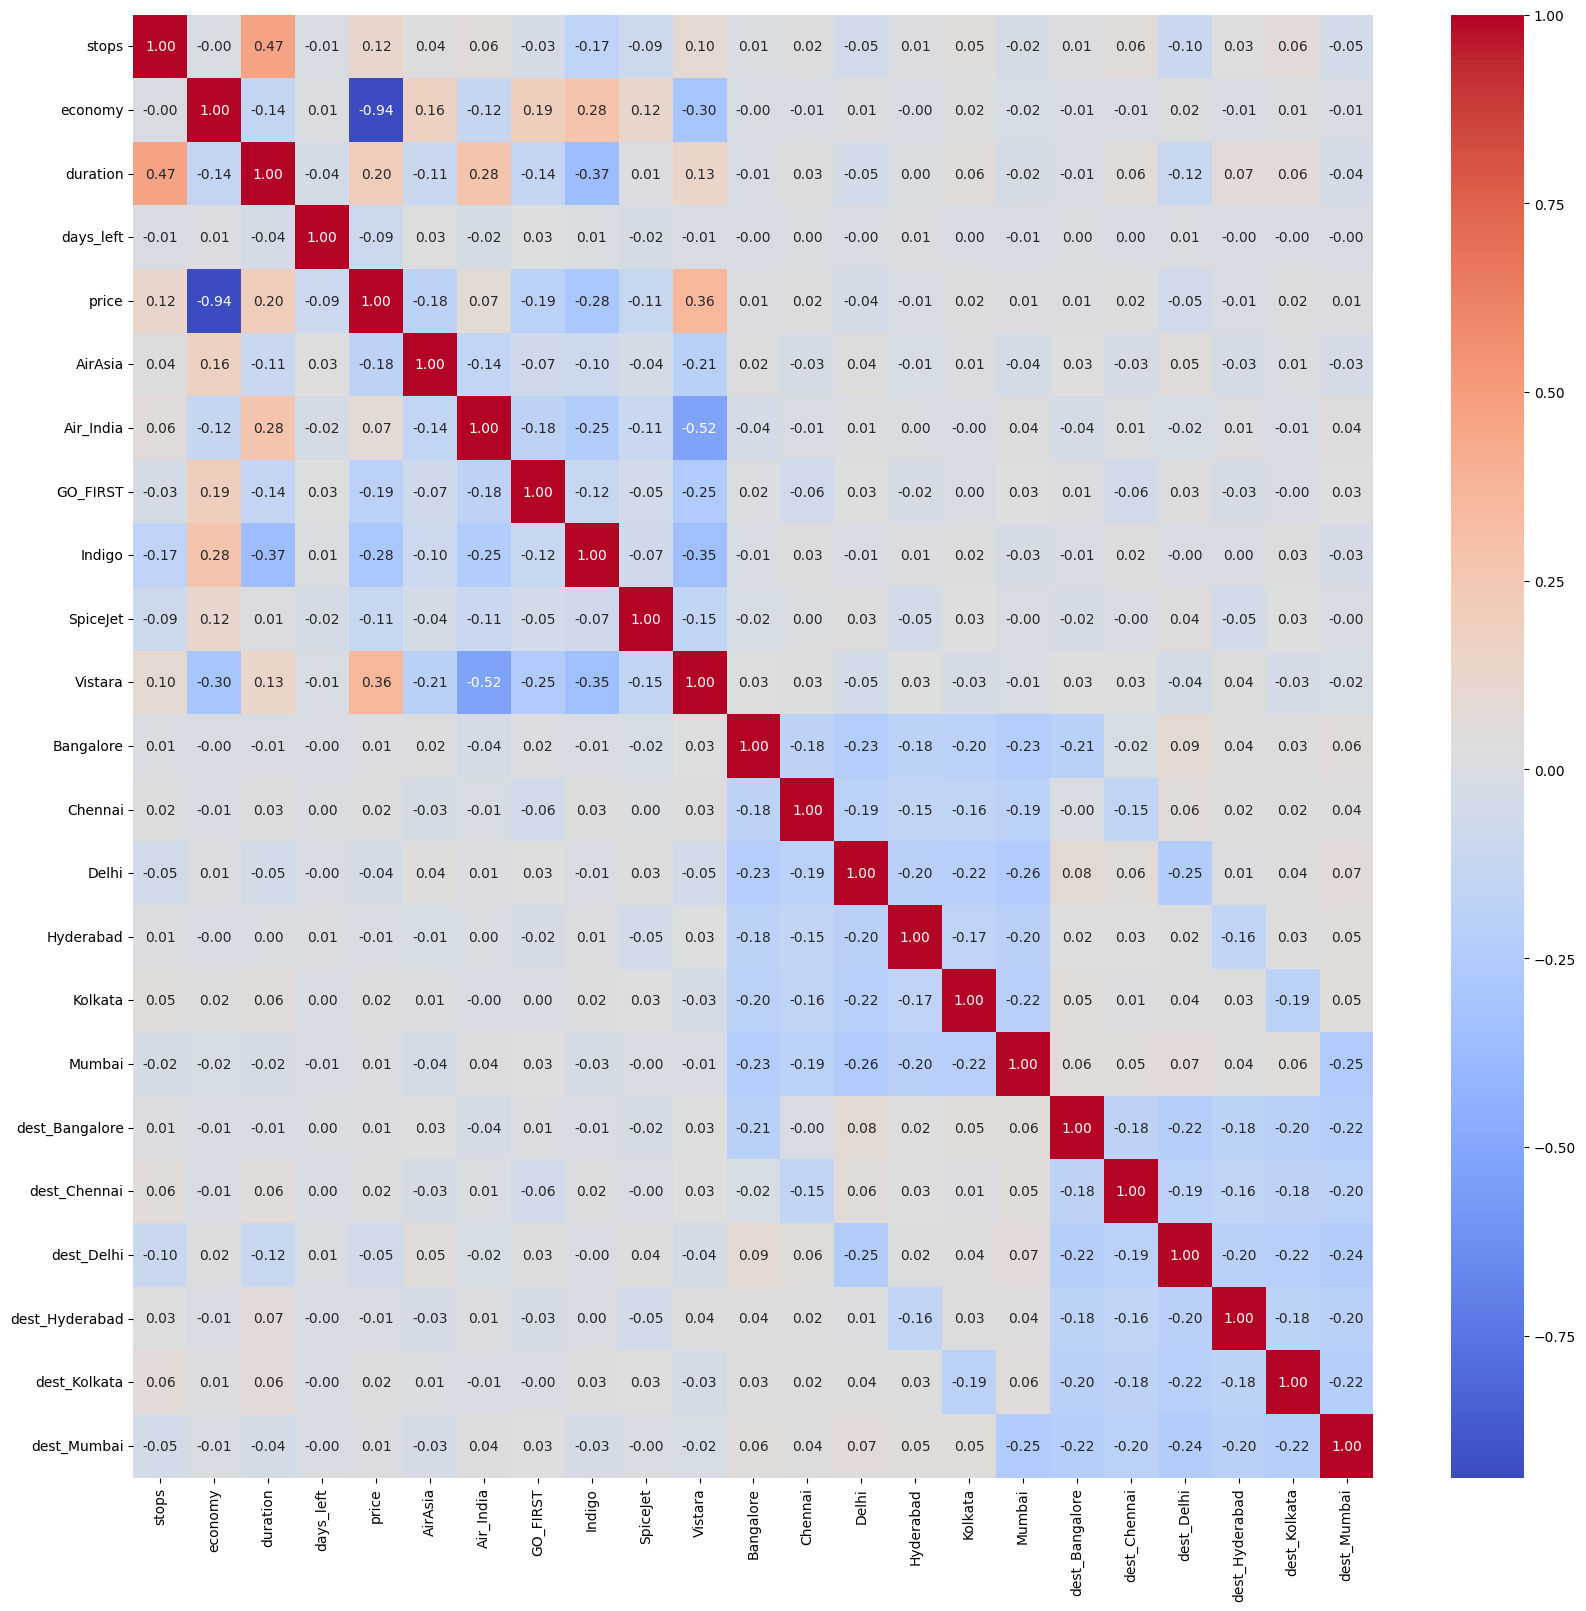

In [64]:
plt.figure(figsize=(20, 19))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')

## Price is barely affected by city of origin or destination

In [65]:
# REMOVE last 12 columns
df = df.iloc[:, :-12]

In [66]:
df

,stops,economy,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,0,1,2.17,1,5953,0,0,0,0,1,0
1,0,1,2.33,1,5953,0,0,0,0,1,0
2,0,1,2.17,1,5956,1,0,0,0,0,0
3,0,1,2.25,1,5955,0,0,0,0,0,1
4,0,1,2.33,1,5955,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
300148,1,0,10.08,49,69265,0,0,0,0,0,1
300149,1,0,10.42,49,77105,0,0,0,0,0,1
300150,1,0,13.83,49,79099,0,0,0,0,0,1
300151,1,0,10.00,49,81585,0,0,0,0,0,1


## Scale the data for better performance

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df.drop(columns=['price'], axis=1)
y = df['price']
# Split the data into training, validation, and test sets
# 50% training, 25% validation, 25% test
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.5, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_, y_, test_size=0.5, random_state=42)

# Fit the scaler on the training data
scaler.fit(X_train)
# Transform the training, validation, and test data
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
# Check the shape of the data
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(150076, 10)
(75039, 10)
(75038, 10)


In [79]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Define the model
model = XGBRegressor(objective='reg:squarederror', random_state=42)
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [200, 250, 300],
    'max_depth': [5, 10],
    'learning_rate': [0.2, 0.3],
    'subsample': [1.0]
}
# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
# Fit the model
grid_search.fit(X_train, y_train)
# Get the best parameters
best_params = grid_search.best_params_


Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [80]:
best_params

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}

Best parameters: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
RMSE: 4970.971194135453
MAE: 2892.7919787130613
Test RMSE: 5037.357013013805
Test MAE: 2899.1116230846033


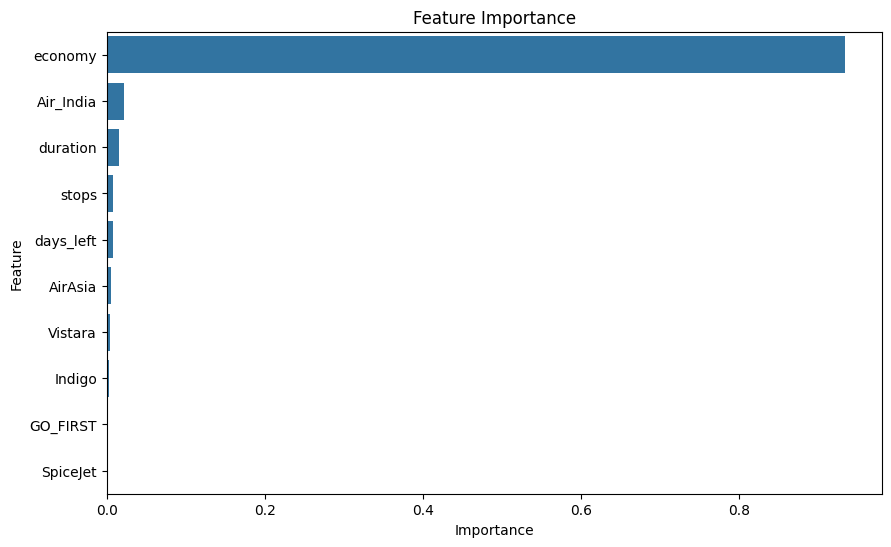

In [82]:
best_model = grid_search.best_estimator_
# Make predictions on the validation set
y_pred = best_model.predict(X_val)
# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
# Calculate the MAE
mae = mean_absolute_error(y_val, y_pred)
print(f"Best parameters: {best_params}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
# Make predictions on the test set
y_test_pred = best_model.predict(X_test)
# Calculate the RMSE
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
# Calculate the MAE
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"Test RMSE: {rmse_test}")
print(f"Test MAE: {mae_test}")
# Feature importance
import matplotlib.pyplot as plt
import xgboost as xgb
# Get feature importance
importance = best_model.feature_importances_
# Get feature names
feature_names = X.columns
# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importance})
# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='importance', ascending=False)
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [83]:
best_model.score(X_test, y_test)

0.9509886878135595

In [73]:
best_model.score(X_train, y_train)

0.952857156919847

In [74]:
best_model.score(X_val, y_val)

0.9513153751698658

## Check if polynomial features are needed

In [78]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)
# Define the model
model_poly = XGBRegressor(objective='reg:squarederror', n_estimators=200, max_depth=5, learning_rate=0.2, subsample=1.0, random_state=42)

# Fit the model
model_poly.fit(X_train_poly, y_train)
# Make predictions on the validation set
print(f"Validation: {model_poly.score(X_val_poly, y_val)}")
print(f"Test: {model_poly.score(X_test_poly, y_test)}")
print(f"Train: {model_poly.score(X_train_poly, y_train)}")

Validation: 0.9527394891253592
Test: 0.9520953777528341
Train: 0.9567671147952399


# Conclusion

### Model does a great job, scoring over 95% accuracy on validation and test sets
### Model is not overfitting, as the training and validation scores are similar
### Polynomial features do not improve the model - attempted with 2,3,4,5 degrees

### Model is not affected by the city of origin or destination
### Most important feature is whether the ticket is economy or business class, followed by Air_India tickets being most expensive
### Duration, stops and how many days in advance the ticket was purchased are also important
### And lastly by importance of features are all other airlines, except Air_India